# AI-Powered Smart Surveillance System

This project simulates a smart surveillance system that uses AI to classify objects captured by CCTV cameras. To minimize memory usage, recording is triggered **only when specific objects (like humans, animals, or vehicles)** are detected. We use the Fashion-MNIST dataset as a **proxy for object classes** before applying it to real-world surveillance.

---


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


## Load Data

We're using the Fashion-MNIST dataset, which is directly available via TensorFlow. It's often used as a drop-in replacement for MNIST and consists of 10 object classes. We will **load it via the TensorFlow URL API**, simulating a cloud-based workflow.


In [29]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Exploratory Data Analysis (EDA)

Let's understand our dataset better by:
- Checking image shapes and value ranges
- Visualizing a few samples
- Reviewing class distribution


Train set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


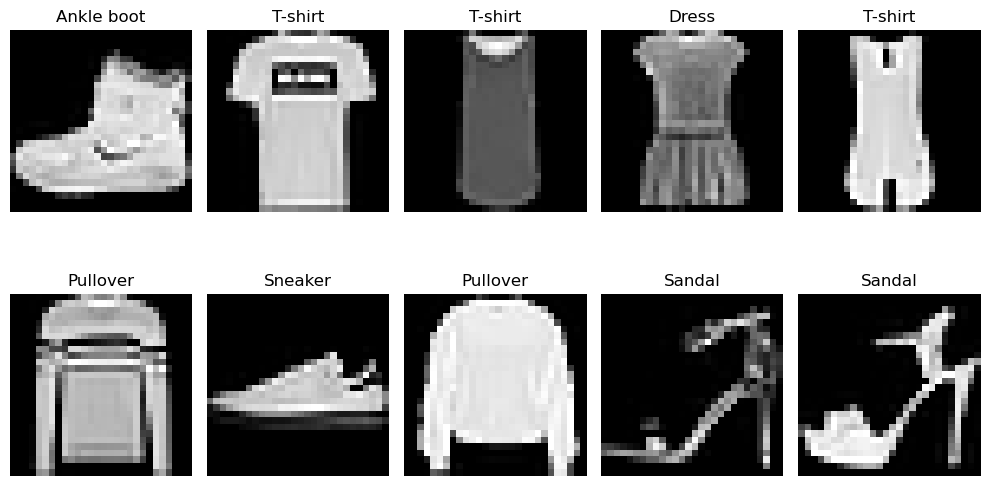

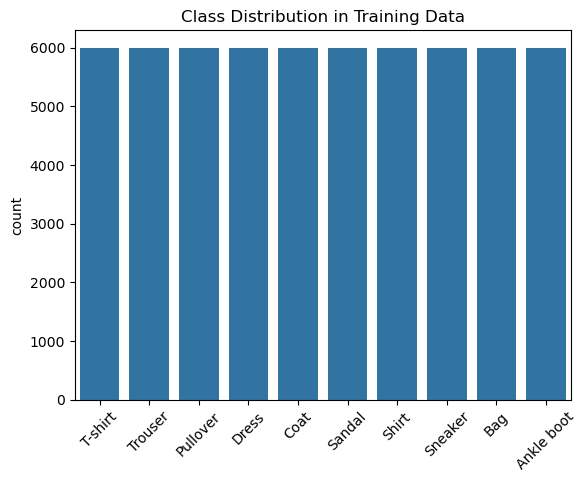

In [31]:
print("Train set shape:", train_images.shape)
print("Test set shape:", test_images.shape)

# Display sample images
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Check label distribution
sns.countplot(x=train_labels)
plt.title("Class Distribution in Training Data")
plt.xticks(ticks=range(10), labels=class_names, rotation=45)
plt.show()


## Data Preprocessing

We normalize pixel values to [0, 1] and reshape data for the CNN input.


In [33]:
# Normalize
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


## Train-Validation Split

We split the training data further to create a validation set.


In [35]:
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.1, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])


Training samples: 54000
Validation samples: 6000


## CNN Model Selection & Training

We build a simple CNN with two Conv2D layers, followed by MaxPooling, Flatten, Dense, and Dropout.


In [37]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64,
                    validation_data=(X_val, y_val))


C:\Users\Dell\anaconda2\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 38s 40ms/step - accuracy: 0.7120 - loss: 0.7931 - val_accuracy: 0.8527 - val_loss: 0.3864
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.8588 - loss: 0.3836 - val_accuracy: 0.8842 - val_loss: 0.3092
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 33s 39ms/step - accuracy: 0.8812 - loss: 0.3284 - val_accuracy: 0.8942 - val_loss: 0.2821
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 33s 39ms/step - accuracy: 0.8909 - loss: 0.2973 - val_accuracy: 0.8990 - val_loss: 0.2744
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.9021 - loss: 0.2689 - val_accuracy: 0.9017 - val_loss: 0.2615
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.9086 - loss: 0.2473 - val_accuracy: 0.9070 - val_loss: 0.2648
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.9138 - loss: 0.2325 - val_accuracy: 0.9083 - val_loss: 0.2439
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9197 - loss: 0.2142 - 

## Model Evaluation

We now evaluate performance on the test set and visualize key metrics.


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9069 - loss: 0.2679
Test Accuracy: 0.9083


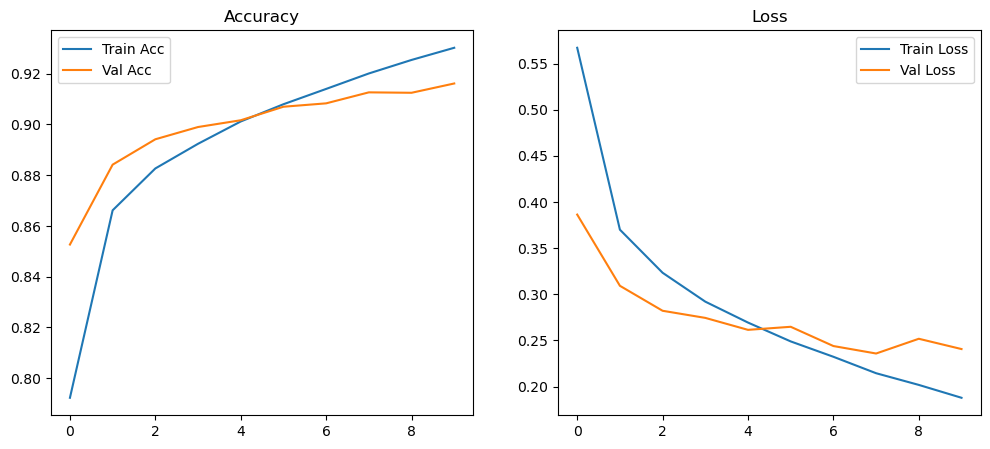

In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()


##  Confusion Matrix & Classification Report
Helps identify which classes are confused with others.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


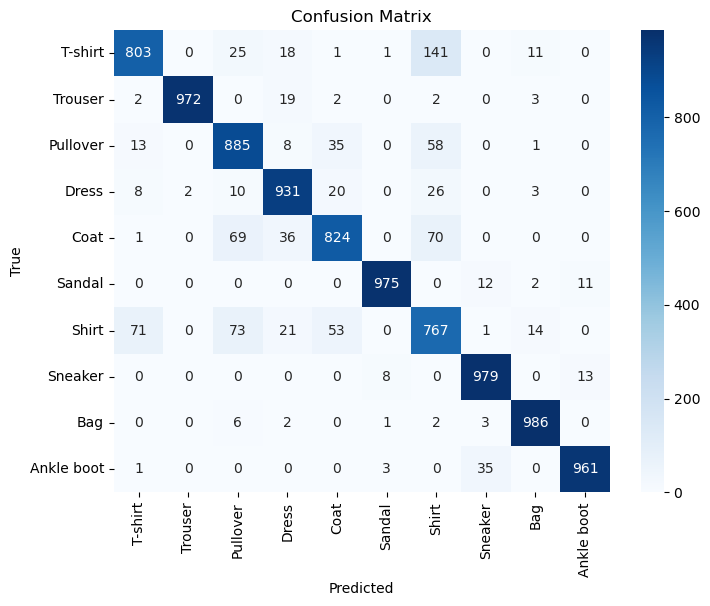

              precision    recall  f1-score   support

     T-shirt       0.89      0.80      0.85      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.83      0.89      0.86      1000
       Dress       0.90      0.93      0.91      1000
        Coat       0.88      0.82      0.85      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.72      0.77      0.74      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.97      0.99      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [41]:
y_pred = model.predict(test_images).argmax(axis=1)

cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(test_labels, y_pred, target_names=class_names))
